<a href="https://colab.research.google.com/github/ajay4198/Playstore-App/blob/main/PlayStoreAppReviewCTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>




# **Exploratory Data Analysis (EDA) Play Store App Review Analysis**




Mounting the Drive to Access Data 


In [ ]:
# Mounting the drive in Google Colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the Libraries


In [ ]:
# Importing all the required libraries for the data exploration
#basic operations
import numpy as np
#for dataframe manipulations
import pandas as pd 
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline
#for data time manipulation
import datetime

Reading First DataFrame (csv file)

In [ ]:
# Loading the csv file 

df=pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT 1/Play Store Data.csv")

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#lets also check the shape of the dataset
print(df.shape)

(10841, 13)


In [ ]:
#lets check the column names present in the data
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#lets prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#returns the number of missing values in the data set.
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#lets calculate the total missing values in the dataset 
total_of_df=df.isnull().sum().sort_values(ascending=False)

In [ ]:
#lets calculate the percentage of missing values in the data
percent_of_df=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

In [ ]:
#lets store the above two values in a dataset called missing data
missing_of_df=pd.concat([total_of_df,percent_of_df],axis=1,keys=['Total','Percent %'])

In [ ]:
#printing value of missing dataset
missing_of_df.style.set_properties(**{'border': '1.3px solid red',
                          'color': 'green'})

,Total,Percent %
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


In [ ]:
#head is use for showing starting 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#tail is use for showing ending 5 rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#Detecting missing values 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#unique elements in Category columns
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
#Checking the index of 1.9 value
indices=np.where(df["Category"]=="1.9")
indices

(array([10472]),)

In [ ]:
#Shifting the Values of index 10472
df.loc[10472]=df.loc[10472].shift()
df["App"].loc[10472]=df["Category"].loc[10472]
df['Category'].loc[10472]=np.nan
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [ ]:
# Converting null value with Tools as i searched it on google play 
x=df.loc[10472, 'Category'] = "TOOLS"
df["Category"].fillna(x)

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

In [ ]:
# when we shift the row Genres become nan for row 10472 so using tools for same 
x=df.loc[10472, 'Genres'] = "Tools"
df["Genres"].fillna(x)

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10841, dtype: object

In [ ]:
# checking index for same row
df[10470:10479]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up
10478,Sci Fi Sounds,FAMILY,3.2,4,8.0M,"1,000+",Free,0,Everyone,Entertainment,"November 2, 2017",1.0,4.0 and up


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


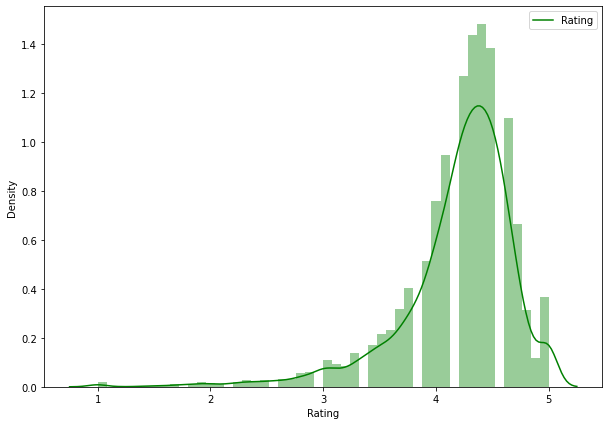

In [ ]:
# checking null value in dictplot for using mean median and mode 

plt.figure(figsize=(10,7))
sns.distplot(df['Rating'],color = 'green')
plt.legend(['Rating'])
plt.show()

In [ ]:
# checking_median
checking_median = df["Rating"].median()
checking_median

4.3

In [ ]:
# checking mode of rating
checking_mode = df["Rating"].mode()
checking_mode


0    4.4
dtype: object

In [ ]:
#using median function for removing nan in by checking the value of mean median mode
Rating_null_cleaning=df["Rating"].median()
df["Rating"].fillna(Rating_null_cleaning,inplace=True)
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')

In [ ]:
# changing data type of Reviews column to numeric 
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
#df.replace({'M': "m"}, inplace=True)
type=df.dtypes
type

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#checking top 5 row
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:

#replace Veries with Device with nan
df["Size"]=df.Size.replace("Varies with device",np.nan)
# replacing values of magabytes to kilobytes 
df["Size"]=df.Size.str.replace("M","000")
# replacing values of kilobytes with space
df["Size"]=df.Size.str.replace("k","")
#  replacing values of , with space
df["Size"]=df.Size.str.replace(",","")
#  replacing values of . with space
df["Size"]=df.Size.str.replace(".","")


# changing datatype to numeric values
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')
type=df.dtypes
type


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#filling the Size Column Null Values with median
Size_null_cleaning=df["Size"].median()
df["Size"].fillna(Size_null_cleaning,inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# replacing irrelevant symbols with space and changing dtype to numeric 
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df.Installs.str.replace(",","")
# df.replace({',': ""}, inplace=True)
df['Installs'] = pd.to_numeric(df['Installs'],errors='coerce')

# type of all data in dataframe 
type=df.dtypes
type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# Checking The Answers 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [ ]:
# I googled App Name to see Type and it's type came out as Free 
df["Type"].replace(to_replace=np.nan,value="Free",inplace=True)

In [ ]:
#Now we havew only 2 unique values
print(df["Type"].unique())

['Free' 'Paid']


In [ ]:
# checking the null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:

#Replacing $ values with space
df['Price'].astype(str)  #fjgfjh
df['Price']=df['Price'].apply((lambda x:str(x).replace("$","") if "$" in str(x) else str(x)))
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
type=df.dtypes
type

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# using datetime function for Last updated columns 
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
type=df.dtypes
type
 
 

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

**DATA** **MANIPULATION**

In [ ]:
# unique value of Current Version 
df["Current Ver"].unique()
df["Current Ver"].value_counts

<bound method IndexOpsMixin.value_counts of 0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 10841, dtype: object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
#Fillna method is used to Fill Null Values 
df[["Current Ver","Android Ver"]]=df[["Current Ver","Android Ver"]].fillna("-")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
#using columns for filling null values with 0
df["Price"]=df["Price"].fillna(0)

In [ ]:
#hurreyyy there is no null values in it
df.isnull().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Reading Users DataFrame (csv file)**

In [ ]:
#reading data of users columns
users_df=pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT 1/User Reviews.csv")

In [ ]:
#top 15 rows 
users_df.head(15)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [ ]:
#lets also check the shape of the dataset 2
print(users_df.shape)

(64295, 5)


In [ ]:
#lets check the column names present in the data
users_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
#lets prints information about the DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#returns the number of missing values in the data set.
users_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# returns a DataFrame object where all the values are replaced with a Boolean value True for NA (not-a -number) values, and otherwise False
users_df["Sentiment_Subjectivity"].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
64290     True
64291     True
64292     True
64293     True
64294     True
Name: Sentiment_Subjectivity, Length: 64295, dtype: bool

**DATA CLEANING OF USER DATASET**

In [ ]:
#lets calculate the total missing values in the data
total=users_df.isnull().sum().sort_values(ascending=False)

In [ ]:
#lets calculate the percentage of missing values in the data
percent=((users_df.isnull().sum()/users_df.isnull().count())*100).sort_values(ascending=False)

In [ ]:
#lets store the above two values in a dataset called missing data
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent %'])

In [ ]:
#print missing data variable
missing_data.style.bar()

,Total,Percent %
Translated_Review,26868,41.788631
Sentiment,26863,41.780854
Sentiment_Polarity,26863,41.780854
Sentiment_Subjectivity,26863,41.780854
App,0,0.000000


**DATA** **MANIPULATION** **OF USERS REVIEW**

In [ ]:
#filling the Null values with none value
users_df[["Translated_Review","Sentiment"]]=users_df[["Translated_Review","Sentiment"]].fillna("none")

In [ ]:
# Droping all Null values 
users_df=users_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
users_df.head()

AttributeError: ignored

In [ ]:
users_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


# **QUERY ANALYSIS**

#**Top 10 Reviews based on App and Top 10n Lowest Review App**



In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
# Sorting Values to See Top 10 Highest Reviews Of App 
Apps_with_Highest_rev = df.sort_values(by='Reviews', ascending=False).head(10)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,"100,000+",Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5.5M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"March 31, 2017",1.23,2.1 and up
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10M,"50,000+",Free,0,Everyone,Tools,"September 28, 2017",2.3,4.0.3 and up


**Facebook ,WhatsApp Messenger ,instagram And Messenger Are Most Reviwed App**

In [ ]:
# Sorting Values to See Top 10 Lowest Reviews Of App 
Apps_with_lowest_rev = df.sort_values(by='Reviews', ascending=True).head(10)
Apps_with_lowest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9669,Masha and the Bear- House Cleaning Games for G...,FAMILY,4.3,0.0,74000.0,100,Paid,1.99,Everyone,Educational;Pretend Play,2018-01-25,0.0.1,4.1 and up
9925,Reisedealz.eu,SOCIAL,4.3,0.0,10000.0,10,Free,0.00,Everyone,Social,2015-09-24,1.0,4.0 and up
6545,BN Inscript Improved Keyboard,PRODUCTIVITY,4.3,0.0,75000.0,10,Free,0.00,Everyone,Productivity,2017-11-06,1.0,2.3 and up
10734,FP Connect,COMMUNICATION,4.3,0.0,22000.0,100,Free,0.00,Teen,Communication,2017-12-15,3.15.1,4.1 and up
9262,EC-Contractors,HOUSE_AND_HOME,4.3,0.0,60000.0,1,Free,0.00,Everyone,House & Home,2018-04-25,14.01,4.0.3 and up
9917,Eu Sou Rico,FINANCE,4.3,0.0,14000.0,0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up
7409,CI CAFETERIAS UBER,PRODUCTIVITY,4.3,0.0,28000.0,100,Free,0.00,Everyone,Productivity,2018-06-11,18.6.5,4.4 and up
5088,Ag Weather Tools,WEATHER,4.3,0.0,46000.0,500,Free,0.00,Everyone,Weather,2018-01-09,1.0.1,5.0 and up
7432,CJ Apps,BUSINESS,4.3,0.0,24000.0,10,Free,0.00,Everyone,Business,2018-04-10,2.1,4.1 and up
9235,ec.tv,LIFESTYLE,4.3,0.0,86000.0,50,Free,0.00,Everyone,Lifestyle,2016-11-11,1.0,4.1 and up


**Masha and the Bear- House Cleaning Game , Reisedealz.eu ,BN Inscript Improved Keyboard,FP Connect,EC-Contractors,Eu Sou Rico,9	CI CAFETERIAS UBER,Ag Weather Tools	,CJ Apps And ec.tv	 Are Lowest Reviwed App**

# **Top Categories on Google Playstore**

In [ ]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xy = []
yx = []
for i in range(len(x)):
    xy.append(x[i])
    yx.append(y[i])

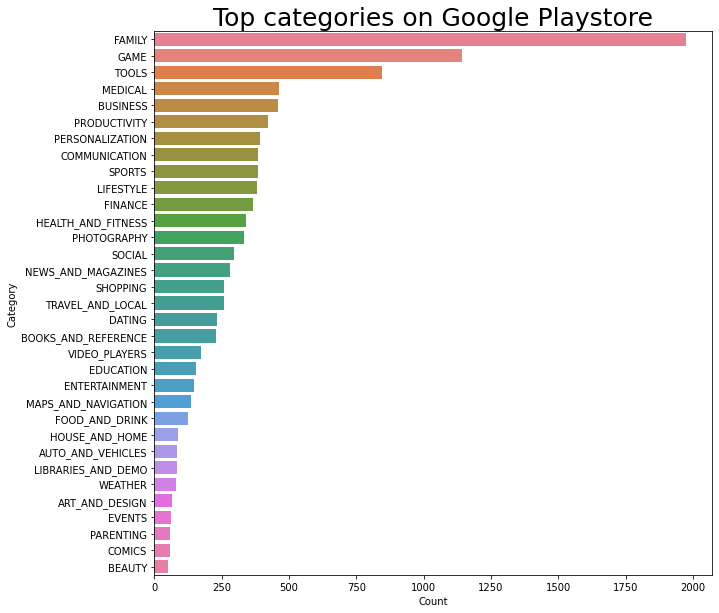

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xy, y = yx, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

#**Print Maximum & Minimum Size of Apps**
#**Print Maximum And Minimum Price of Apps**

In [ ]:
#Maximum size of app
print("Maximum Size of App",df["Size"].max())
print("Minimum Size of App",df["Size"].min())

Maximum Size of App 100000.0
Minimum Size of App 11.0


In [ ]:
#Maximum price of an app
#Minimum price of an app
print("Maximum Price of App",df["Price"].max())
print("Minimum Price of App",df["Price"].min())

Maximum Price of App 400.0
Minimum Price of App 0.0


**Maximum Size Of App is 100Gb & Minimum Size of App is 11kb**
**Maximum Price of App 400.0 & Minimum Price of App 0.0**

# **Wrote a function in which we get to know the rating of every apps by giving Rating As Input**


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
def recommend_app_based_on_rating(x):
  "function to show the app which user want to see according to reviews"
  a=df[["App","Category"]][df['Rating']==x]
  a=a.sort_values(by="Category")
  return a.head()

In [ ]:
#function call
recommend_app_based_on_rating(4.3)

,App,Category
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN
18,FlipaClip - Cartoon animation,ART_AND_DESIGN
23,Mcqueen Coloring pages,ART_AND_DESIGN
48,How To Draw Food,ART_AND_DESIGN
8871,Test Application DT 02,ART_AND_DESIGN


**You can Add Your Wish Rating to See the Apps Based On Rating**

# **Top 10 Paid App**

In [ ]:
# # top 10 paid app 
paid_app=df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
paid_app[["App","Price"]]

,App,Price
4367,I'm Rich - Trump Edition,400.00
5359,I am rich(premium),399.99
5373,I AM RICH PRO PLUS,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
5354,I am Rich Plus,399.99
5351,I am rich,399.99
5358,I am Rich!,399.99
5362,I Am Rich Pro,399.99
4362,💎 I'm rich,399.99
5364,I am rich (Most expensive app),399.99


# **Percent of Free Vs Paid Apps in store**

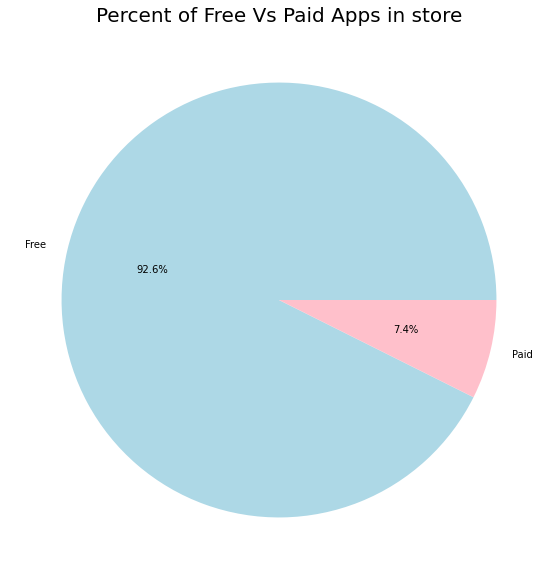

In [ ]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["lightblue","pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

**92.6% have Free Apps & 7.4% have Paid Apps**

#**Which age group in Content Rating has more Contribution use chart to show output**

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,87000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,28000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

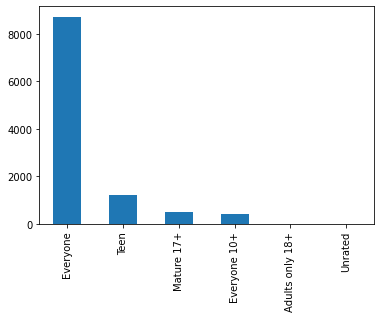

In [ ]:
df["Content Rating"].value_counts().head(10).plot(kind='bar')
plt.show()



**Highest Rating Done by Everyone Then Teen**
**Then Mature 17+ And Everyone 10+ Have almost Same Contribution and No Rating Done by Aldults only 18+ And unrated**

# **Which Sentiments have Greater Portion**


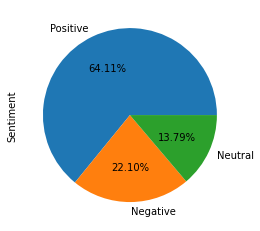

In [ ]:
# Using Value Counts Function to See The Contribution 
users_df["Sentiment"].value_counts().head(10).plot(kind='pie',autopct="%0.2f%%")
plt.show()

**Positive Have 64.11% ,Negative have 22.10% And Neutral have 13.79% in sentiments**

# **Calculate Average of Sentiment Polarity & Sentiment Subjectivity**

In [ ]:
# Using DataFrame.mean() method to get column average
users_df_df2 = users_df["Sentiment_Polarity"].mean()
users_df_df2

0.18214631382977461

**Average of Sentiment Polarity is 0.18214**

In [ ]:
# Using DataFrame.mean() method to get column average
users_df_df3 = users_df["Sentiment_Subjectivity"].mean()
users_df_df3

0.49270392839557814

**Average of Sentiment Subjectivity is 0.4927**

# **Merge Both Datasets**

In [ ]:
# Merging Both Datasets 
merge_df=pd.merge(df,users_df, on = ['App'], how = 'inner')

In [ ]:
# Making them a DataFrame
merge_df=pd.DataFrame(merge_df)

In [ ]:
merge_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love enjoyable fun,Positive,0.433333,0.466667


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72615 entries, 0 to 72614
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     72615 non-null  object        
 1   Category                72615 non-null  object        
 2   Rating                  72615 non-null  float64       
 3   Reviews                 72615 non-null  float64       
 4   Size                    72615 non-null  float64       
 5   Installs                72615 non-null  int64         
 6   Type                    72615 non-null  object        
 7   Price                   72615 non-null  float64       
 8   Content Rating          72615 non-null  object        
 9   Genres                  72615 non-null  object        
 10  Last Updated            72615 non-null  datetime64[ns]
 11  Current Ver             72615 non-null  object        
 12  Android Ver             72615 non-null  object

#**Sentiments based on each Numeric Data**

In [ ]:
#sentiments based on each category

Sentiment_df = merge_df.groupby(['Category', 'Sentiment']).sum().head(30)
Sentiment_df



Rating       Reviews        Size      Installs  \
Category            Sentiment                                                   
ART_AND_DESIGN      Negative    259.2  9.773900e+05   1355000.0      68300000   
                    Neutral     263.2  1.435281e+06   1811000.0     111300000   
                    Positive   1121.4  8.592939e+06   6888000.0     549500000   
AUTO_AND_VEHICLES   Negative     77.7  5.386790e+05    500000.0      17000000   
                    Neutral     164.0  8.893600e+05   1131000.0      18000000   
                    Positive   1081.3  1.377999e+07   6649000.0     413300000   
BEAUTY              Negative    266.1  1.129589e+06   1570000.0     114500000   
                    Neutral     366.6  8.492430e+05   2246000.0      93500000   
                    Positive    803.4  3.263111e+06   5258000.0     290500000   
BOOKS_AND_REFERENCE Negative    573.2  7.836030e+07   4678000.0    7701000000   
                    Neutral     560.6  5.724343e+07   4760000.0    5065300000   
                    Positive   2393.4  3.328958e+08  19521000.0   22613800000   
BUSINESS            Negative   1426.2  4.771987e+07  10165000.0    3309600000   
                    Neutral    2343.8  6.414396e+07  16208000.0    4805800000   
                    Positive   6259.1  1.225541e+08  49018000.0   11429200000   
COMICS              Negative      8.4  5.134400e+04     66000.0       2000000   
                    Neutral      35.6  1.170720e+05    444000.0       4040000   
                    Positive    305.4  1.715928e+06   2646000.0      66060000   
COMMUNICATION       Negative   1576.3  9.349846e+08  12596560.0  129114000000   
                    Neutral    1196.3  6.543179e+08   9153475.0   98119000000   
                    Positive   5464.7  2.812737e+09  43667713.0  486984000000   
DATING              Negative   2872.3  1.524179e+07  26025000.0     846060000   
                    Neutral    2193.4  1.294060e+07  18971000.0     724900000   
                    Positive   8099.4  4.270479e+07  70615000.0    2168400000   
EDUCATION           Negative    971.9  8.597398e+08   6854000.0   13788140000   
                    Neutral     559.5  1.625904e+08   4431000.0    2876610000   
                    Positive   6069.5  5.072150e+09  41135000.0   81600840000   
ENTERTAINMENT       Negative   2373.9  1.482452e+08  17822000.0    4198850000   
                    Neutral    1467.2  3.959555e+07   9774000.0    1292300000   
                    Positive   5960.5  2.994793e+08  44594000.0    9092800000   

                               Price  Sentiment_Polarity  \
Category            Sentiment                              
ART_AND_DESIGN      Negative     0.0          -26.005380   
                    Neutral      0.0            0.000000   
                    Positive     0.0          115.674045   
AUTO_AND_VEHICLES   Negative     0.0           -5.167424   
                    Neutral      0.0            0.000000   
                    Positive     0.0          105.936736   
BEAUTY              Negative     0.0          -36.386429   
                    Neutral      0.0            0.000000   
                    Positive     0.0          101.742177   
BOOKS_AND_REFERENCE Negative     0.0          -39.728724   
                    Neutral      0.0            0.000000   
                    Positive     0.0          224.347794   
BUSINESS            Negative     0.0         -100.895759   
                    Neutral      0.0            0.000000   
                    Positive     0.0          682.363403   
COMICS              Negative     0.0           -0.100000   
                    Neutral      0.0            0.000000   
                    Positive     0.0           37.578575   
COMMUNICATION       Negative     0.0          -92.923301   
                    Neutral      0.0            0.000000   
                    Positive     0.0          449.522525   
DATING              Negative     0.0         -224.249930  

# **Installation with each and every SENTIMENTS & Plot a Bar Graph for Same**

In [ ]:
# Installation With every Sentiments Positive,Negative,Neutral
merge_df.groupby(['Installs','Sentiment'])['Rating'].count().unstack()


Sentiment,Negative,Neutral,Positive
Installs,,,
1000,12,12,163
10000,118,134,524
50000,106,101,747
100000,952,835,3251
500000,796,686,2732
1000000,2008,1789,7165
5000000,1922,1091,5895
10000000,3515,1513,9233
50000000,1918,663,3735


Text(0, 0.5, 'Installs')

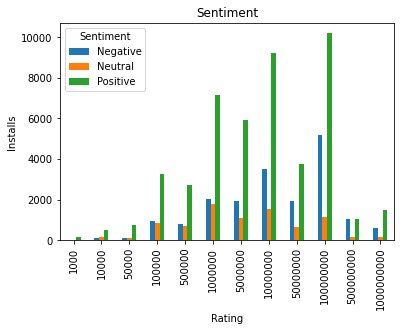

In [ ]:
#Ploting Based on Rating By Installs And Sentiment in Merge DF
merge_df.groupby(['Installs','Sentiment'])['Rating'].count().unstack().plot(kind='bar')
plt.title('Sentiment')
plt.xlabel('Rating')
plt.ylabel('Installs')

Conclusion:

The dataset consist of many columns with Null Values, hence only those columns were taken into account which were useful and there null values were replaced with another suitable values.

After analysing the data using various functions and methods of Numpy and Pandas Libraries and Data Visualization techniques, variuos observation are made which are inferred below every visualization.

After Analyzing the dataset we have got answers to some of the serious & interesting questions which any of the android users would love to know.